In [2]:
from qwak.qwak import QWAK
import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm
import sympy as simp

# One element Grover search

In [3]:
n=200
t = (np.pi/2) * np.sqrt(n)
# t=0
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

qw = QWAK(graph=graph,markedSearch=[(n//2,-1)],laplacian=True)
qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
print(qw.getAdjacencyMatrix())

[[199.+0.j  -1.+0.j  -1.+0.j ...  -1.+0.j  -1.+0.j  -1.+0.j]
 [ -1.+0.j 199.+0.j  -1.+0.j ...  -1.+0.j  -1.+0.j  -1.+0.j]
 [ -1.+0.j  -1.+0.j 199.+0.j ...  -1.+0.j  -1.+0.j  -1.+0.j]
 ...
 [ -1.+0.j  -1.+0.j  -1.+0.j ... 199.+0.j  -1.+0.j  -1.+0.j]
 [ -1.+0.j  -1.+0.j  -1.+0.j ...  -1.+0.j 199.+0.j  -1.+0.j]
 [ -1.+0.j  -1.+0.j  -1.+0.j ...  -1.+0.j  -1.+0.j 199.+0.j]]


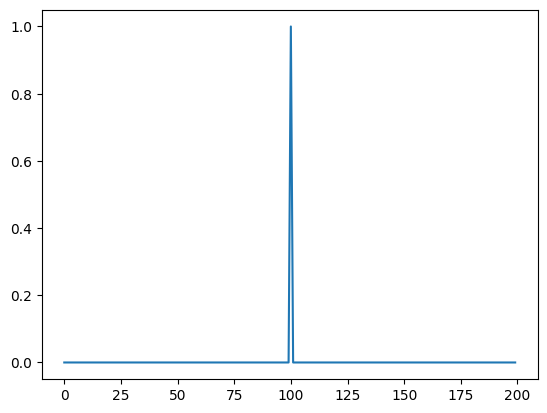

In [4]:
plt.plot(qw.getProbVec())

# Multiple element Grover Search

In [4]:
n=32
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

nMarkedElements = 5
markedSearch = [((n//2) + x,-1) for x in range(0,nMarkedElements)]
print(markedSearch)

t = (np.pi/2) * np.sqrt(n/len(markedSearch[0]))

qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
qw.runWalk(time=t,gamma=gamma,initStateList=initCond)

[(16, -1), (17, -1), (18, -1), (19, -1), (20, -1)]


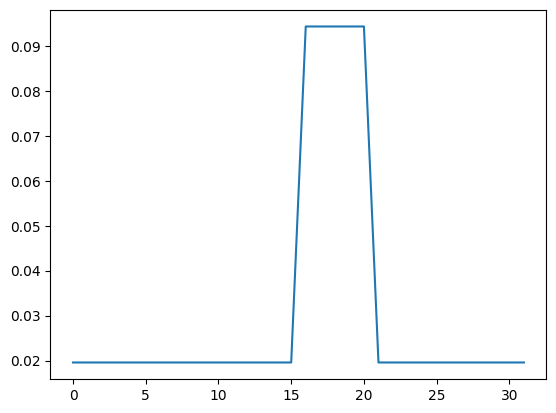

In [5]:
plt.plot(qw.getProbVec())

# Single Shot Grover

In [19]:
k = 6
n=2**(k)
# t = (np.pi/2) * np.sqrt(n)
t=np.pi
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)
markedSearch = [(x,-1) for x in range(n//4,n//2)]

qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
qw.runWalk(time=t,gamma=gamma,initStateList=initCond)

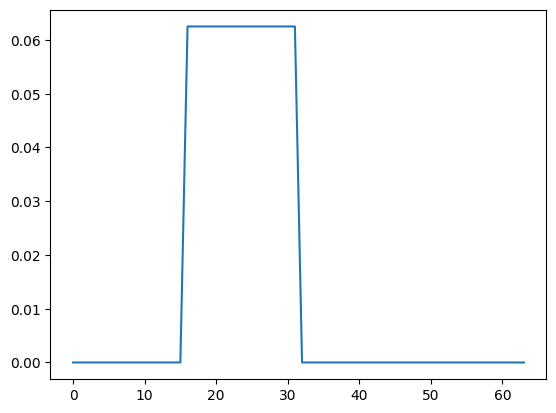

In [20]:
plt.plot(qw.getProbVec().round(4))

# Multiple single element searches

In [7]:
numberOfWalks = 4
minWalkSize = 3
nList = [2**x for x in range(minWalkSize,numberOfWalks+minWalkSize)]

tList = [(np.pi/2) * np.sqrt(x) for x in nList]

gammaList = [1/x for x in nList]

markedSearchList =[[(x//2,-1)] for x in nList]


qwakList = []

for (t,markedSearch,n,gamma) in zip(tList,markedSearchList,nList,gammaList):
    graph = nx.complete_graph(n)
    qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
    initCond = list(range(0,n))
    qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
    qwakList.append(qw)


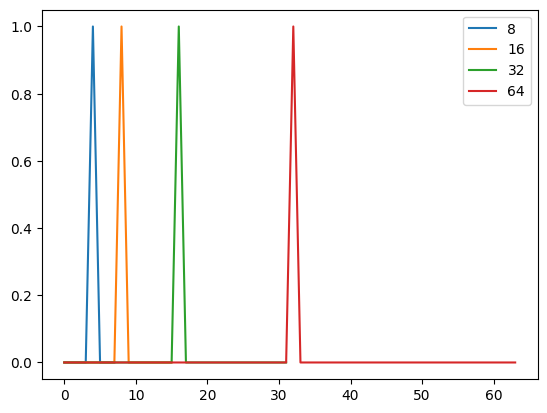

In [8]:
for qwak in qwakList:
    plt.plot(qwak.getProbVec(),label=f"{qwak.getDim()}")
plt.legend()

# Various multiple element searches

In [22]:
numberOfWalks = 5
minWalkSize = 3
nList = [2**x for x in range(minWalkSize,numberOfWalks+minWalkSize)]


gammaList = [1/x for x in nList]

nMarkedElements = 3
markedSearchList =[[(x//2+k,-1) for k in range(0,nMarkedElements)] for x in nList]

tList = [(np.pi/2) * np.sqrt(x/nMarkedElements) for x in nList]

qwakList = []

for (t,markedSearch,n,gamma) in zip(tList,markedSearchList,nList,gammaList):
    graph = nx.complete_graph(n)
    qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
    initCond = list(range(0,n))
    qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
    print(f"qwakSize:{qw.getDim()}\t qwakTime:{qw.getTime()}")
    qwakList.append(qw)


qwakSize:8	 qwakTime:2.565099660323728
qwakSize:16	 qwakTime:3.6275987284684352
qwakSize:32	 qwakTime:5.130199320647456
qwakSize:64	 qwakTime:7.2551974569368705
qwakSize:128	 qwakTime:10.260398641294913


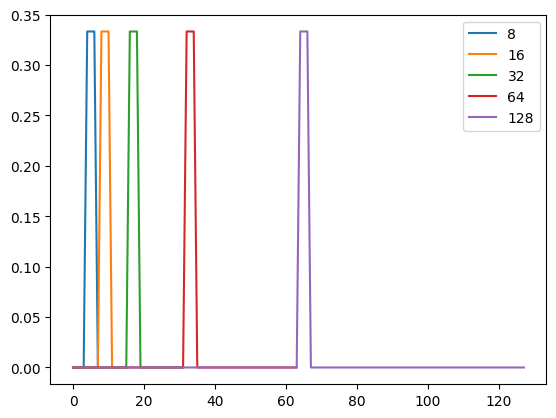

In [23]:
for qwak in qwakList:
    plt.plot(qwak.getProbVec(),label=f"{qwak.getDim()}")
    
plt.legend()

# Multiple Single Shot Grover searches

In [61]:
numberOfWalks = 5
minWalkSize = 3
nList = [2**x for x in range(minWalkSize,numberOfWalks+minWalkSize)]


gammaList = [1/x for x in nList]

nMarkedElementsList = [x//4 for x in nList]
print(nMarkedElementsList)

markedSearchListAux = []
markedSearchList =[]
# markedSearchList =[[(x//4+k,-1) for k in range(y) ] for x,y in zip(nList,nMarkedElementsList)]
for x,n in zip(nMarkedElementsList,nList):
    for k in range(x):
        markedSearchListAux.append((n//4+k,-1))
        
    markedSearchList.append(markedSearchListAux)
    markedSearchListAux = []
    
print(len(markedSearchList))
tList = [(np.pi/2) * np.sqrt(x/len(y)) for x,y in zip(nList,markedSearchList)]

qwakList = []

for (t,markedSearch,n,gamma) in zip(tList,markedSearchList,nList,gammaList):
    graph = nx.complete_graph(n)
    qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
    initCond = list(range(0,n))
    qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
    print(f"qwakSize:{qw.getDim()}\t qwakTime:{qw.getTime()}")
    qwakList.append(qw)


[2, 4, 8, 16, 32]
5
qwakSize:8	 qwakTime:3.141592653589793
qwakSize:16	 qwakTime:3.141592653589793
qwakSize:32	 qwakTime:3.141592653589793
qwakSize:64	 qwakTime:3.141592653589793
qwakSize:128	 qwakTime:3.141592653589793


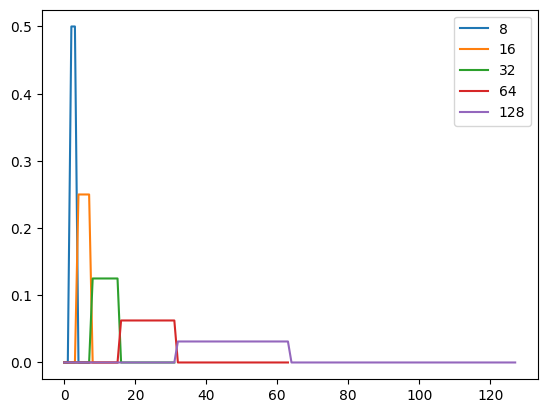

In [62]:
for qwak in qwakList:
    plt.plot(qwak.getProbVec(),label=f"{qwak.getDim()}")
    
plt.legend()